# **Problem Statement** :
 Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Goal is to find out the factors affecting the demand for these shared electriy cycles in the market**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,chisquare,chi2_contingency,f_oneway,kruskal,shapiro,levene,kstest
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import mannwhitneyu
from scipy.stats import skew, kurtosis,pearsonr,spearmanr
import os

In [2]:
os.getcwd()
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [3]:
df=pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1.Exploratory Data Analysis

### 1.Checkin for  missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# changing the type of datetime column
df['datetime']=pd.to_datetime(df['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<Axes: >

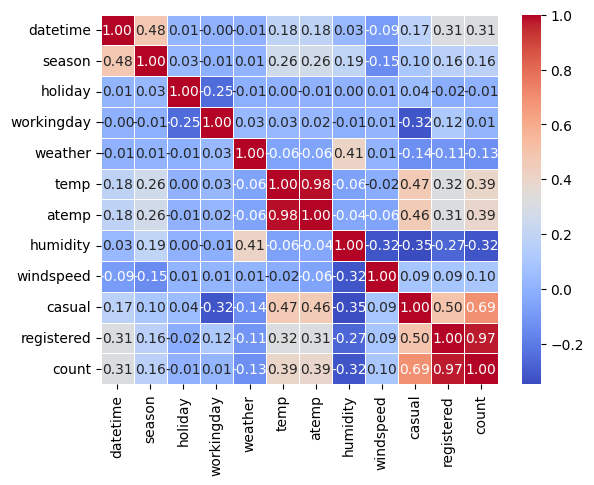

In [6]:
correlation=df.corr(method='pearson')
sns.heatmap(correlation,cmap='coolwarm',fmt='.2f',annot=True,linewidths=0.5)

In [7]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [8]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


#### **Observation**:
 Since there are no missing values in the dataset, we will proceed with a detailed univariate analysis of each feature to better understand their individual distributions and explore their relationships with the total number of bikes rented.

### 2.Univariate Analysis  and Impact on Product Orders

#### A. DateTime Column

In [9]:
df1=df.copy()
df1['datetime'].value_counts()

,count
datetime,
2011-01-01 00:00:00,1
2012-05-01 21:00:00,1
2012-05-01 13:00:00,1
2012-05-01 14:00:00,1
2012-05-01 15:00:00,1
...,...
2011-09-02 04:00:00,1
2011-09-02 05:00:00,1
2011-09-02 06:00:00,1


In [10]:
df1['datetime'].describe()

,datetime
count,10886
mean,2011-12-27 05:56:22.399411968
min,2011-01-01 00:00:00
25%,2011-07-02 07:15:00
50%,2012-01-01 20:30:00
75%,2012-07-01 12:45:00
max,2012-12-19 23:00:00


In [11]:

df1['year']=df1['datetime'].dt.year
df1['month']=df1['datetime'].dt.month
df1['day']=df1['datetime'].dt.day
df1['day_name']=df1['datetime'].dt.day_name()
df1['is_Weekend']=df1['day_name'].isin(['Saturday','Sunday'])
df1['hour_of_Day']=df1['datetime'].dt.hour
df1.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour_of_Day
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838


In [12]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,is_Weekend,hour_of_Day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,True,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,True,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,True,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,True,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,True,4


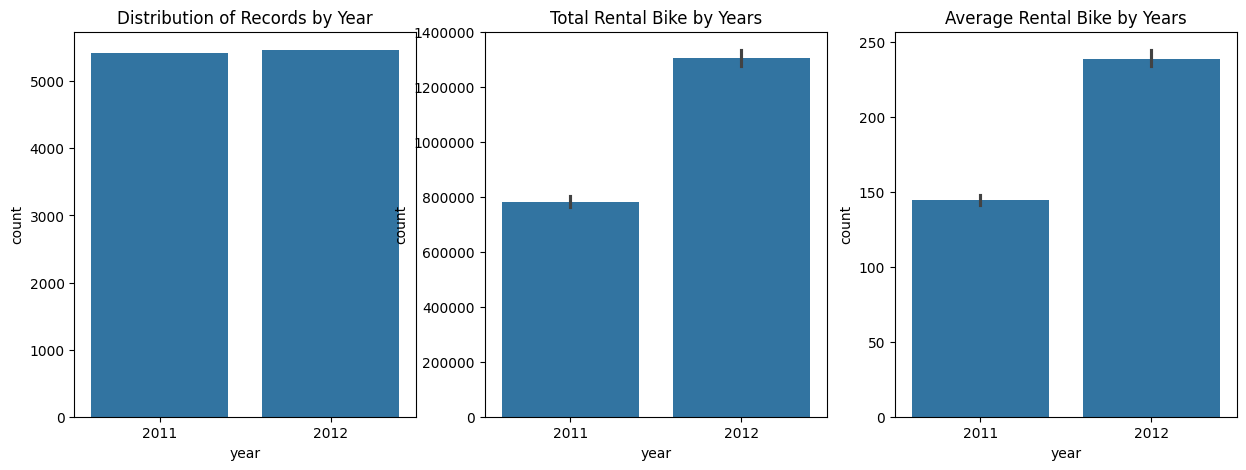

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df1,x='year')
plt.title('Distribution of Records by Year')

plt.subplot(1,3,2)
sns.barplot(df1,x='year',y='count',estimator='sum')
plt.title('Total Rental Bike by Years')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,3,3)
sns.barplot(df1,x='year',y='count')
plt.title('Average Rental Bike by Years')
plt.show()

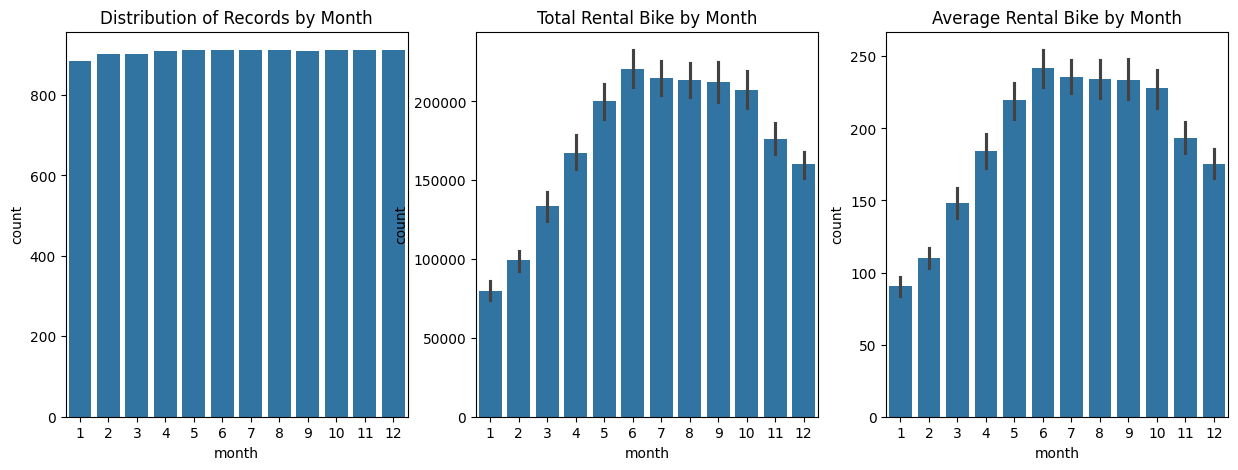

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df1,x='month')
plt.title('Distribution of Records by Month')

plt.subplot(1,3,2)
sns.barplot(df1,x='month',y='count',estimator='sum')
plt.title('Total Rental Bike by Month')

plt.subplot(1,3,3)
sns.barplot(df1,x='month',y='count')
plt.title('Average Rental Bike by Month')
plt.show()



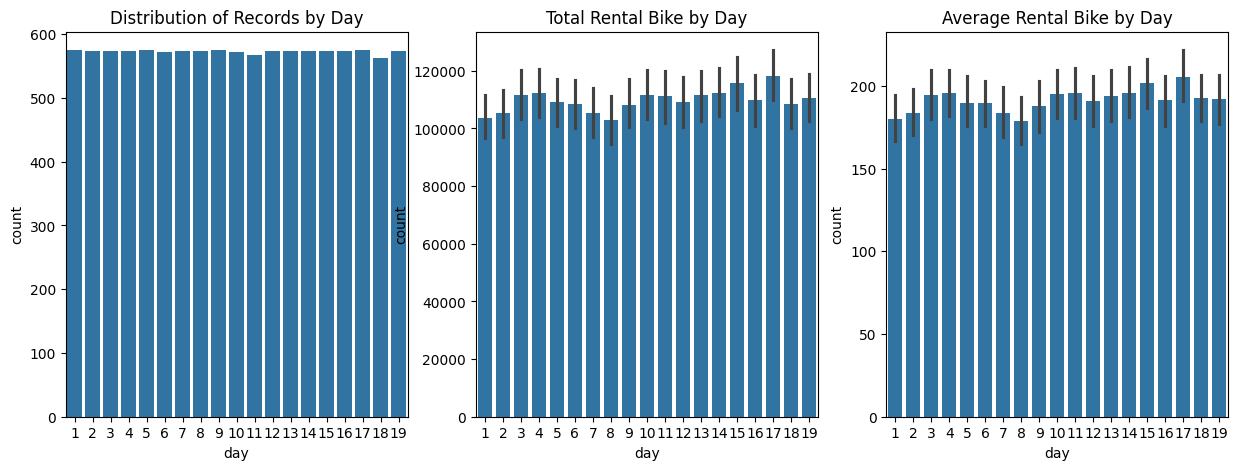

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df1,x='day')
plt.title('Distribution of Records by Day')

plt.subplot(1,3,2)
sns.barplot(df1,x='day',y='count',estimator='sum')
plt.title('Total Rental Bike by Day')

plt.subplot(1,3,3)
sns.barplot(df1,x='day',y='count')
plt.title('Average Rental Bike by Day')
plt.show()



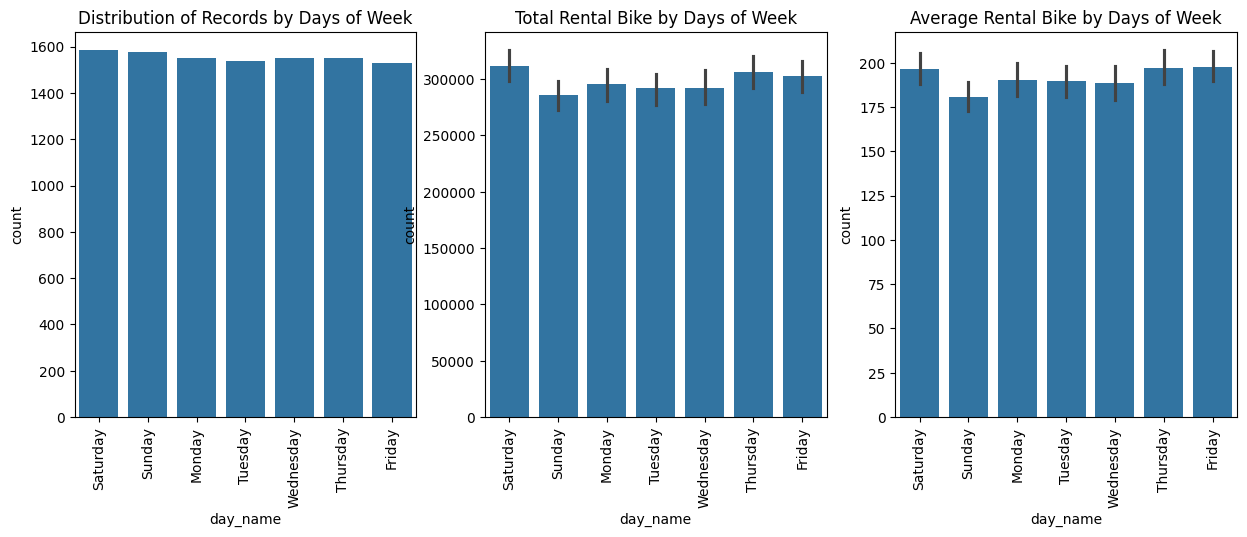

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df1,x='day_name')
plt.title('Distribution of Records by Days of Week')
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
sns.barplot(df1,x='day_name',y='count',estimator='sum')
plt.title('Total Rental Bike by Days of Week')
plt.xticks(rotation='vertical')

plt.subplot(1,3,3)
sns.barplot(df1,x='day_name',y='count')
plt.xticks(rotation='vertical')
plt.title('Average Rental Bike by Days of Week')
plt.show()

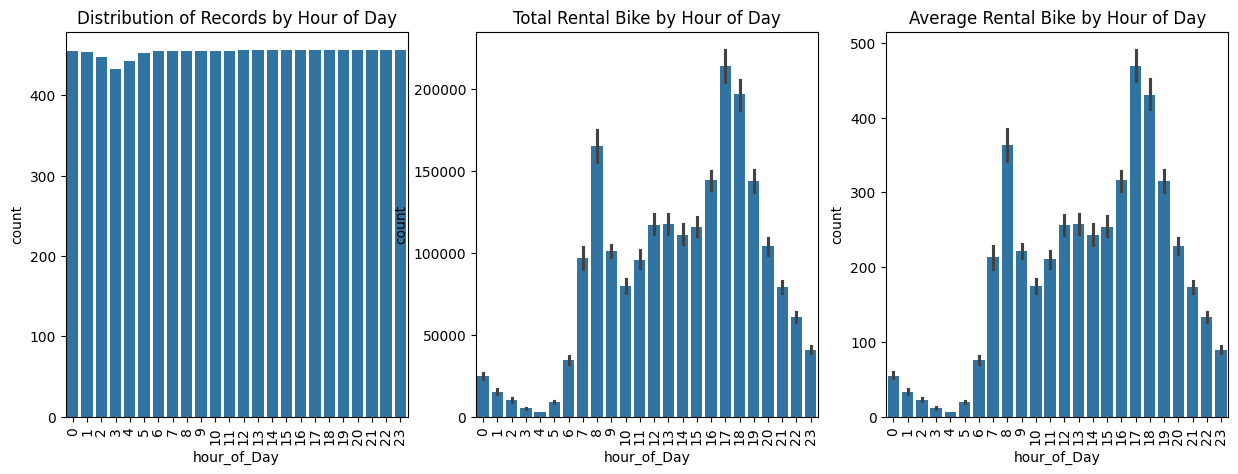

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df1,x='hour_of_Day')
plt.title('Distribution of Records by Hour of Day')
plt.xticks(rotation='vertical')


plt.subplot(1,3,2)
sns.barplot(df1,x='hour_of_Day',y='count', estimator='sum')
plt.xticks(rotation='vertical')
plt.title('Total Rental Bike by Hour of Day')


plt.subplot(1,3,3)
sns.barplot(df1,x='hour_of_Day',y='count')
plt.xticks(rotation='vertical')
plt.title('Average Rental Bike by Hour of Day')
plt.show()

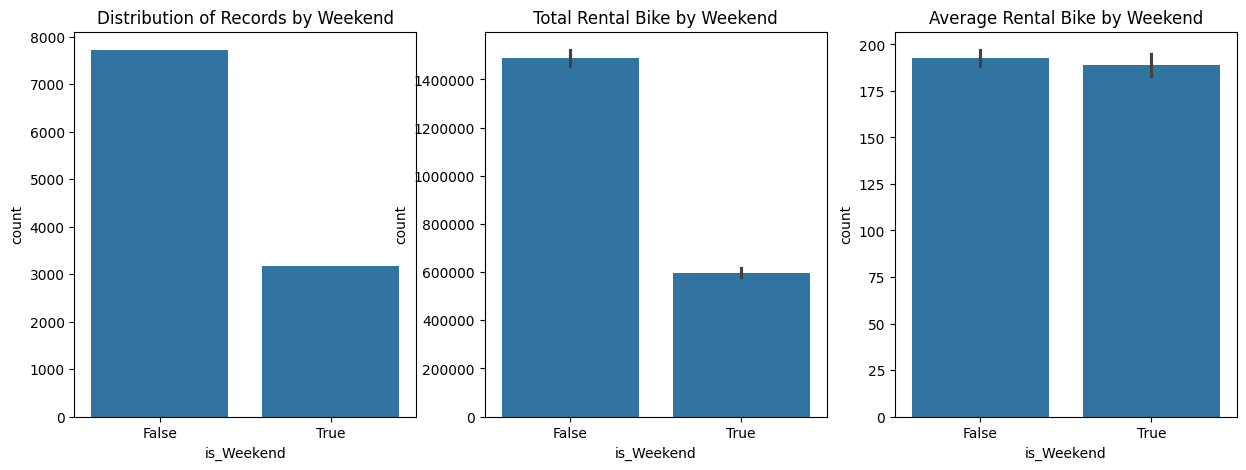

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df1,x='is_Weekend')
plt.title('Distribution of Records by Weekend')

plt.subplot(1,3,2)
sns.barplot(df1,x='is_Weekend',y='count', estimator='sum')
plt.title('Total Rental Bike by Weekend')
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(1,3,3)
sns.barplot(df1,x='is_Weekend',y='count',estimator='mean')
plt.title('Average Rental Bike by Weekend')
plt.show()

In [19]:
df1.groupby(['is_Weekend'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
is_Weekend,,,,,,,,
False,7723.0,192.724589,183.883687,1.0,41.0,151.0,278.0,977.0
True,3163.0,188.765096,174.271888,1.0,44.0,128.0,303.5,783.0


In [20]:
weekend=df1['count'][df1['is_Weekend']==True]
weekday=df1['count'][df1['is_Weekend']==False]


In [21]:
shapiro(df1['count'][df1['is_Weekend']==False]),shapiro(weekend)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7723.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.8719635392415016, pvalue=5.9968067214417674e-62),
 ShapiroResult(statistic=0.8839035546386282, pvalue=1.1719443532179681e-43))

In [22]:
levene(weekday,weekend)

LeveneResult(statistic=0.003153454582717379, pvalue=0.955218859658268)

In [23]:
#Since the distribution is not n a normal disb so we will perform maan -whitney u test instead of ttest as it only has two independent group
stat, p_val = mannwhitneyu(weekend, weekday)
print(stat)
print(p_val)

print('less')
stat, p_val = mannwhitneyu(weekend, weekday, alternative='greater')
print(stat)
print(p_val)

print('great')
stat, p_val = mannwhitneyu(weekend, weekday, alternative='greater')
print(stat)
print(p_val)

12229385.5
0.9172853772290441
less
12229385.5
0.45864268861452206
great
12229385.5
0.45864268861452206


##### **Observation**

1. The distribution of data across time components such as hour, day,  month and year is relatively uniform, indicating consistent data recording or user activity throughout these periods and suggesting no significant outliers . As a result, the distributions of aggregated metrics such as the mean and the sum appear similar.

2.  Total and average rental counts exhibit a clear seasonal trend, following a bell-shaped pattern with peak demand during summer months. This suggests that external factors such as weather may significantly influence rental behavior.

3. The total number of bike rentals shows clear peaks at 8 AM and between 5–6 PM, with a gradual increase starting from 7 AM and tapering off after 8 PM. This pattern strongly suggests commuter usage, with higher demand during morning and evening rush hours, likely due to individuals traveling to and from work.

4. While the total number of records is higher on weekdays (7,723) compared to weekends (3,163), the average number of orders per day is nearly the same for both — approximately 192.7 on weekdays vs. 188.7 on weekends. This indicates that although weekends comprise fewer days, the per-day demand remains comparable to weekdays, suggesting consistently high bike usage throughout the week. The slightly higher 75th percentile and median on weekends also hint at occasional spikes in weekend demand.

    a. 🚲 Weekends span fewer days, so total rentals are lower.
    
    b. 📊 Mean orders per day are almost identical, indicating steady demand.
    
    c. 📈 Weekend variability is slightly lower (lower std), suggesting more stable usage patterns.

    To statistically validate this, a Mann–Whitney U test (non-parametric, due to non-normal distribution) was conducted with the alternative hypothesis that weekend orders are greater than weekday orders. The test returned a U-statistic of 1,4122,9385.5 and a p-value of 0.91, indicating no statistically significant difference in rental counts between weekends and weekdays at the 5% significance level.

    ***Conclusion: There is no strong evidence to suggest that bike rentals are significantly higher on weekends. Usage remains consistently high across both periods.***

##### **Next Steps: Temporal Binning and Hypothesis Testing**

Since the total rental count varies significantly across different months, hours of the day, and between weekdays and weekends, we will categorize the month column into four seasons and the hour_of_day column into broader time-of-day bins. This binning will allow for clearer comparisons and enable us to perform hypothesis testing to statistically evaluate whether these time-based factors have a significant impact on rental bike demand.

##### Season

In [24]:
# feature engineering so that we can do hypothesis
bins = [0, 2, 5, 8, 11, 12]
label = ['Winter', 'Spring', 'Summer', 'Fall', 'Winter']
df1['season_explicit'] = pd.cut(df1['month'], bins=bins, labels=label, include_lowest=True, right=True, ordered=False)
df1['season_explicit'].unique()

['Winter', 'Spring', 'Summer', 'Fall']
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

In [25]:
print('Fall :',df1['month'][df1['season_explicit']=='Fall'].unique())
print('Winter :',df1['month'][df1['season_explicit']=='Winter'].unique())
print('Spring :',df1['month'][df1['season_explicit']=='Spring'].unique())
print('Summer :',df1['month'][df1['season_explicit']=='Summer'].unique())

Fall : [ 9 10 11]
Winter : [ 1  2 12]
Spring : [3 4 5]
Summer : [6 7 8]


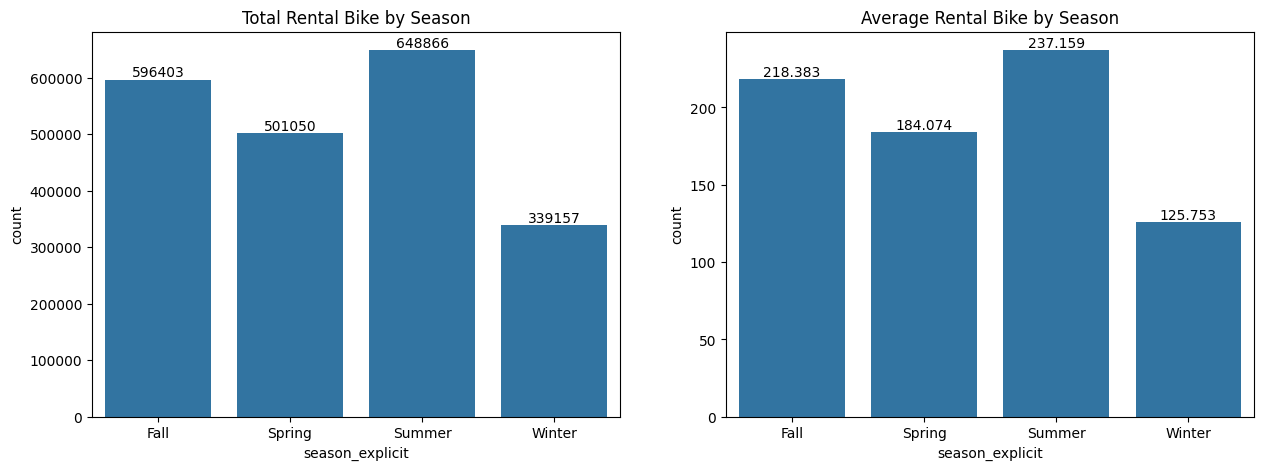

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax=sns.barplot(df1,x='season_explicit',y='count',estimator='sum',errorbar=None)
plt.title('Total Rental Bike by Season')
ax.bar_label(ax.containers[0], fontsize=10);
plt.subplot(1,2,2)
ax=sns.barplot(df1,x='season_explicit',y='count',errorbar=None)
plt.title('Average Rental Bike by Season')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()


In [27]:
Fall=df1['count'][df1['season_explicit']=='Fall']
Spring=df1['count'][df1['season_explicit']=='Spring']
Summer=df1['count'][df1['season_explicit']=='Summer']
Winter=df1['count'][df1['season_explicit']=='Winter']
shapiro(Fall),shapiro(Spring),shapiro(Summer),shapiro(Winter)

(ShapiroResult(statistic=0.8965266280315776, pvalue=1.6639128346075196e-39),
 ShapiroResult(statistic=0.869157493321312, pvalue=5.545622851146553e-43),
 ShapiroResult(statistic=0.9239206326191018, pvalue=3.8461328759133764e-35),
 ShapiroResult(statistic=0.8380853741720926, pvalue=3.669397194021309e-46))

In [28]:
grouped = [group['count'].values for name, group in df1.groupby('season_explicit')]
h_stat, p_val = kruskal(*grouped)
print("Kruskal-Wallis p-value:", p_val)

Kruskal-Wallis p-value: 1.5586650887163282e-127


<ipython-input-28-b786f17a1d4e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = [group['count'].values for name, group in df1.groupby('season_explicit')]


In [29]:
h_stat, p_val = f_oneway(*grouped)
print("ANOWA one way p-value:", p_val)

ANOWA one way p-value: 5.33002739416866e-132


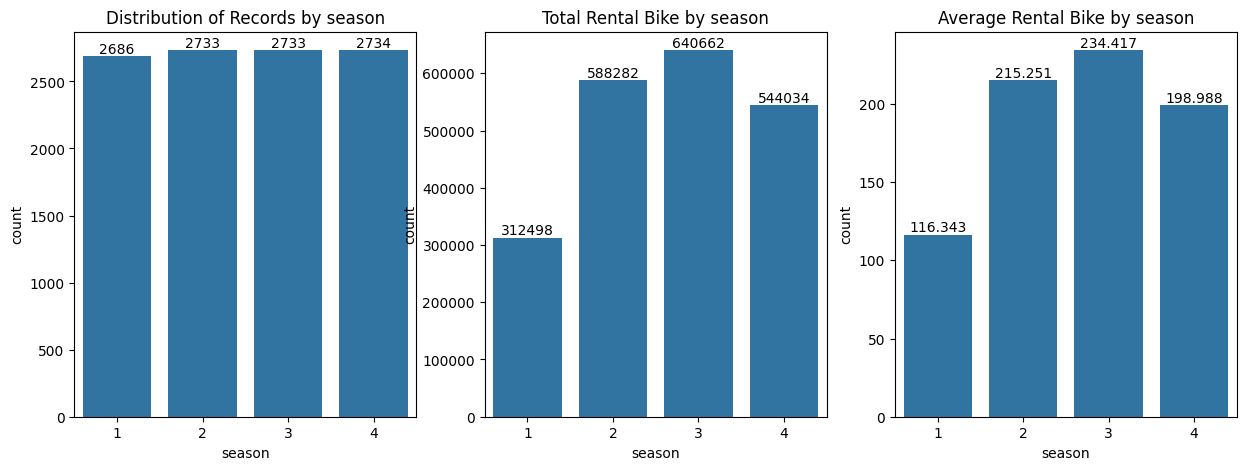

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax=sns.countplot(df1,x='season')
plt.title('Distribution of Records by season')
ax.bar_label(ax.containers[0], fontsize=10);

plt.subplot(1,3,2)
ax=sns.barplot(df1,x='season',y='count', estimator='sum',errorbar=None)
plt.title('Total Rental Bike by season')
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0], fontsize=10);

plt.subplot(1,3,3)
ax=sns.barplot(df1,x='season',y='count',estimator='mean',errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('Average Rental Bike by season')
plt.show()

In [31]:
grouped = [group['count'].values for name, group in df1.groupby('season')]
h_stat, p_val = kruskal(*grouped)
print("Kruskal-Wallis p-value:", p_val)

Kruskal-Wallis p-value: 2.479008372608633e-151


In [32]:
h_stat, p_val = f_oneway(*grouped)
print("ANOWA one way p-value:", p_val)

ANOWA one way p-value: 6.164843386499654e-149


##### Hour of Day

In [33]:
#Similarly for the hours of the day
bins=[-1,5,11,18,23]
labels=['Early Morning','Morning','Afternoon','Evening']

df1['time_of_day']=pd.cut(df1['hour_of_Day'],bins=bins,labels=labels,include_lowest=True)
df1['hour_of_Day'][df1['time_of_day']=='Early Morning'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int32)

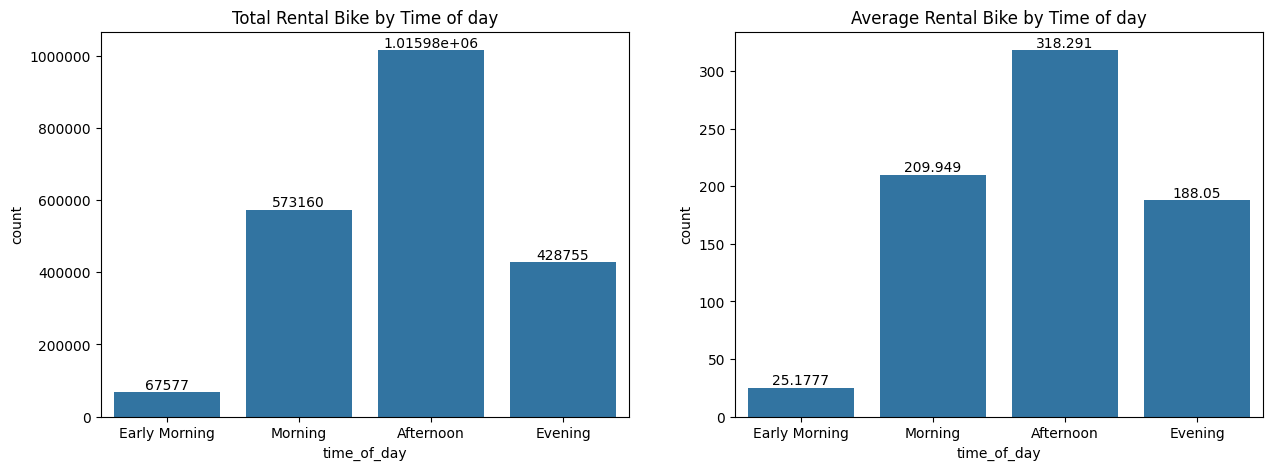

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax=sns.barplot(df1,x='time_of_day',y='count',estimator='sum',errorbar=None)
plt.title('Total Rental Bike by Time of day')
ax.bar_label(ax.containers[0], fontsize=10);
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
ax=sns.barplot(df1,x='time_of_day',y='count',errorbar=None)
plt.title('Average Rental Bike by Time of day')
ax.bar_label(ax.containers[0], fontsize=10);
plt.show()


In [35]:
grouped = [group['count'].values for name, group in df1.groupby('time_of_day')]
h_stat, p_val = kruskal(*grouped)
print("Kruskal-Wallis p-value:", p_val)

Kruskal-Wallis p-value: 0.0


<ipython-input-35-344265d73355>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = [group['count'].values for name, group in df1.groupby('time_of_day')]


In [36]:
h_stat, p_val = f_oneway(*grouped)
print("ANOWA one way p-value:", p_val)

ANOWA one way p-value: 0.0


##### **Observation**


Impact of Time of Day and Season on Bike Rental Orders
Based on the visual analysis and statistical hypothesis testing, we have statistically significant evidence that both time of day and season have a meaningful impact on the number of rental bike orders.

✅ In both cases, the p-values were less than 0.05, which allows us to reject the null hypothesis and conclude that:

1. The time of day significantly affects bike rental demand.

2. The season also has a significant influence on bike rental usage.

This implies that bike rental patterns are not uniformly distributed throughout the day or across different seasons — certain hours and seasons see higher or lower rental activity, driven by user behavior, weather, and commuting trends.



#### B. Holiday

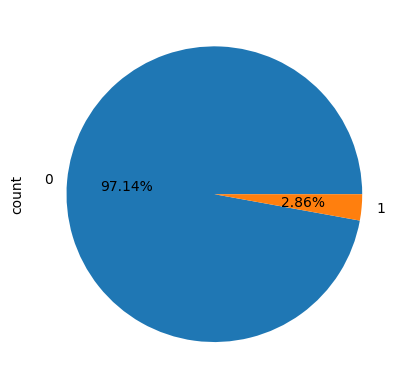

In [37]:
df1['holiday'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [38]:
df1.groupby(['holiday'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


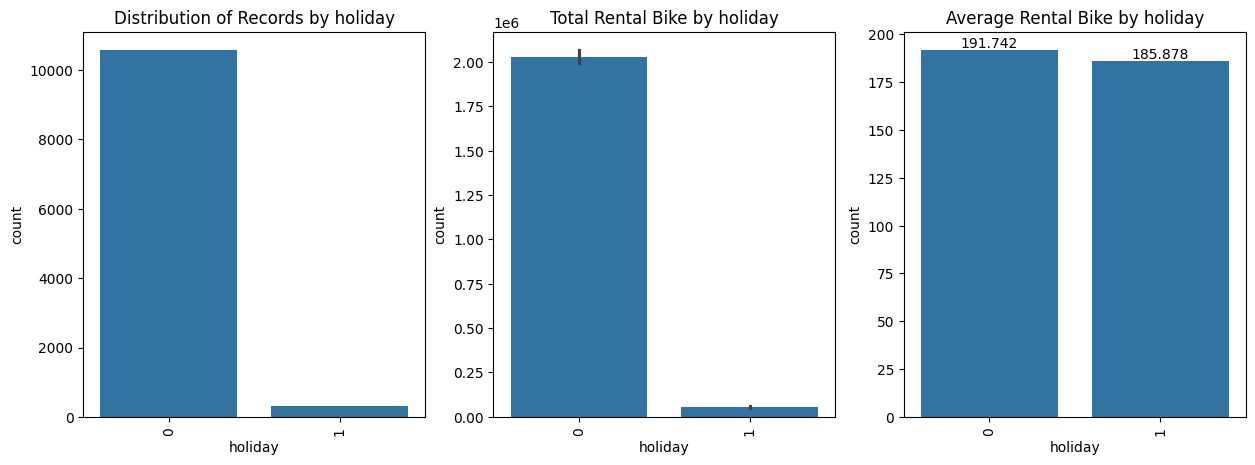

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df1,x='holiday')
plt.title('Distribution of Records by holiday')
plt.xticks(rotation='vertical')


plt.subplot(1,3,2)
sns.barplot(df1,x='holiday',y='count', estimator='sum')
plt.xticks(rotation='vertical')
plt.title('Total Rental Bike by holiday')


plt.subplot(1,3,3)
ax=sns.barplot(df1,x='holiday',y='count', errorbar=None)
plt.xticks(rotation='vertical')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Rental Bike by holiday')
plt.show()

In [40]:
holiday=df1['count'][df1['holiday']==1]
non_holiday=df1['count'][df1['holiday']==0]
holiday.shape,non_holiday.shape

((311,), (10575,))

Text(0, 0.5, 'Average rentals per day')

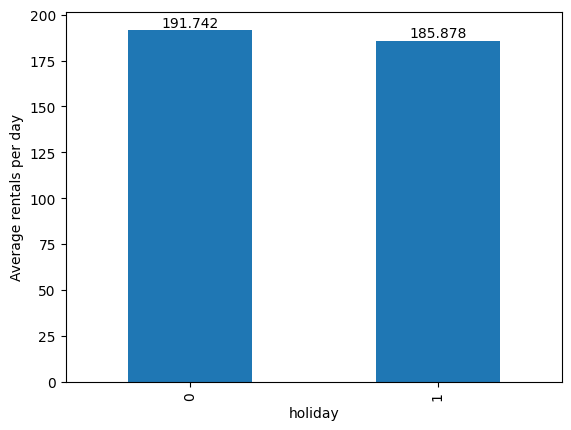

In [135]:
# 1Normalize bike rentals by group size
ax=df1.groupby('holiday')['count'].mean().plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=10)
plt.ylabel("Average rentals per day")


In [41]:
shapiro(df1['count'][df1['holiday']==1]),shapiro(df1['count'][df1['holiday']==0])

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10575.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.8933219721845991, pvalue=5.860375945260022e-14),
 ShapiroResult(statistic=0.8774986090169171, pvalue=1.5553857580870473e-67))

In [42]:
levene(holiday,non_holiday)

LeveneResult(statistic=1.222306875221986e-06, pvalue=0.9991178954732041)

In [43]:
ttest_ind(holiday,non_holiday,alternative='two-sided')

TtestResult(statistic=-0.5626388963477119, pvalue=0.5736923883271103, df=10884.0)

In [44]:
#Since the distribution is not n a normal disb so we will perform maan -whitney u test instead of ttest as it only has two independent group

stat, p_val = mannwhitneyu(holiday, non_holiday)
print(stat)
print(p_val)



stat, p_val = mannwhitneyu(holiday, non_holiday, alternative='less')
print(stat)
print(p_val)

1635100.0
0.8646355678725027
1635100.0
0.43231778393625137


##### **Observation**

1. The total number of records is much higher on non-holidays (10,575) compared to holidays (311), as expected due to the smaller number of holidays. However, the **average number of orders per day** is nearly the same — approximately **191.7 on non-holidays** vs. **185.8 on holidays**.

This suggests that, although holidays are rare (just ~2.86% of the data), the **demand per day remains comparable**, reflecting consistently high bike usage even on holidays. The slightly wider interquartile range (IQR) on holidays also hints at greater variability in usage on some holidays.

**Key insights:**
- 🗓️ Holidays occur less frequently, hence total orders are lower.
- 📊 The mean order count per day is nearly identical between holidays and non-holidays.
- 📈 Holiday usage shows slightly higher IQR, suggesting occasional spikes in demand.

To statistically validate this, a **Mann–Whitney U test** (non-parametric due to non-normal distribution) and a **two-sample t-test** were performed with the alternative hypothesis that the mean number of orders differs between holidays and non-holidays. Both tests returned **p-values of 0.56**, indicating **no statistically significant difference** at the 5% significance level.

Thus, we conclude that **holiday and non-holiday average usage are statistically the same**, supporting the idea of steady demand regardless of the day type.


In [45]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,is_Weekend,hour_of_Day,season_explicit,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,True,0,Winter,Early Morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,True,1,Winter,Early Morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,True,2,Winter,Early Morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,True,3,Winter,Early Morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,True,4,Winter,Early Morning


#### C. Workfing Day

##### Checking for outlier

In [46]:
test=df1[['workingday','day_name']][((df1['is_Weekend']==True) | (df1['holiday']==1) ) & (df1['workingday']==1)]
test['day_name'].value_counts()

,count
day_name,


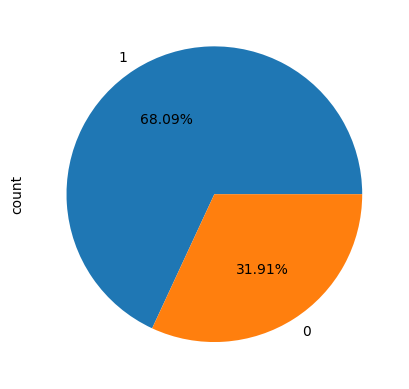

In [47]:
df1['workingday'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [48]:
df1.groupby(['workingday'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


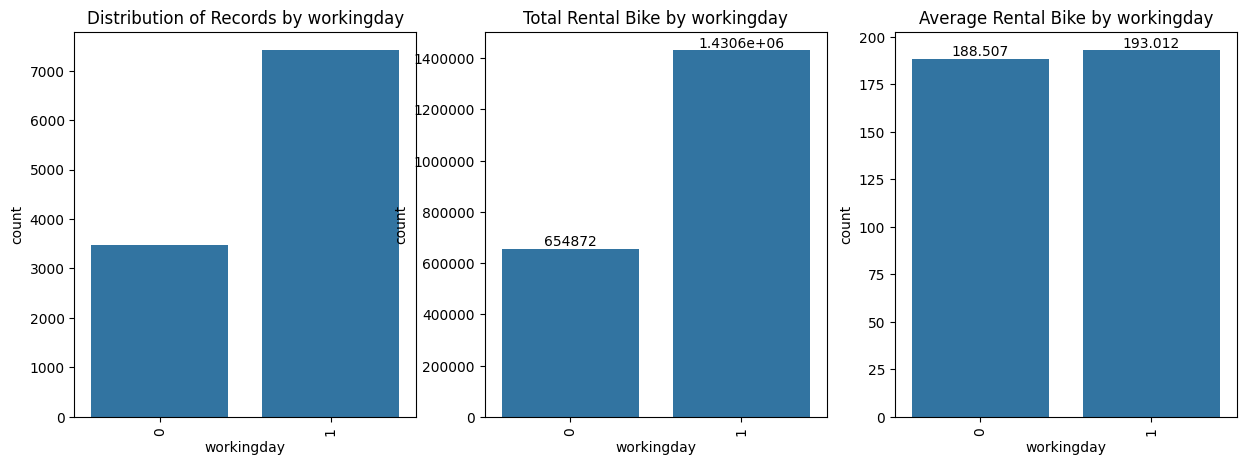

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df1,x='workingday')
plt.title('Distribution of Records by workingday')
plt.xticks(rotation='vertical')


plt.subplot(1,3,2)
ax=sns.barplot(df1,x='workingday',y='count', estimator='sum', errorbar=None)
plt.xticks(rotation='vertical')
plt.title('Total Rental Bike by workingday')
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0], fontsize=10)

plt.subplot(1,3,3)
ax=sns.barplot(df1,x='workingday',y='count', errorbar=None)
plt.xticks(rotation='vertical')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Rental Bike by workingday')
plt.show()

In [50]:
workingday=df1['count'][df1['workingday']==1]
non_workingday=df1['count'][df1['workingday']==0]
workingday.shape,non_workingday.shape

((7412,), (3474,))

In [51]:
shapiro(df1['count'][df1['workingday']==1]),shapiro(non_workingday)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.8702545795617624, pvalue=2.2521124830019574e-61),
 ShapiroResult(statistic=0.885211755076074, pvalue=4.4728547627911074e-45))

In [52]:
import scipy.stats as stats

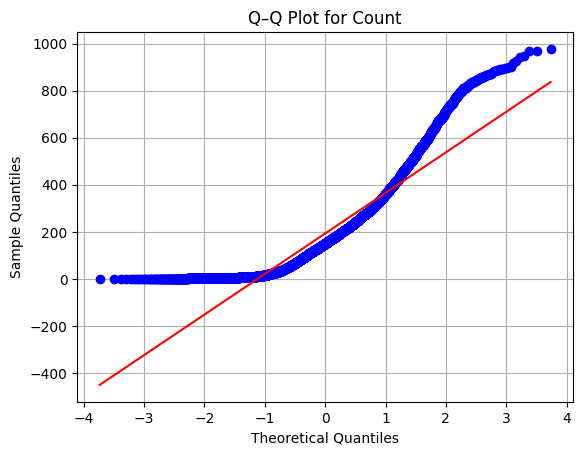

In [53]:
stats.probplot(workingday, dist="norm", plot=plt)
plt.title('Q–Q Plot for Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

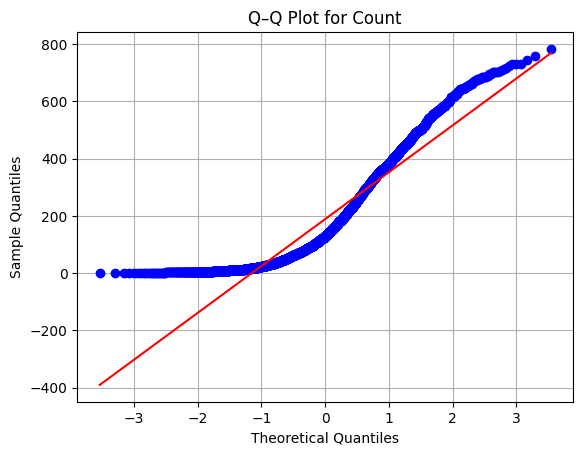

In [54]:
stats.probplot(non_workingday, dist="norm", plot=plt)
plt.title('Q–Q Plot for Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [55]:
levene(workingday,non_workingday)

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

In [56]:
ttest_ind(workingday,non_workingday,alternative='two-sided')

TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

In [57]:
#Since the distribution is not n a normal disb so we will perform maan -whitney u test instead of ttest as it only has two independent group

stat, p_val = mannwhitneyu(workingday, non_workingday)
print(stat)
print(p_val)



stat, p_val = mannwhitneyu(workingday, non_workingday, alternative='less')
print(stat)
print(p_val)

12868495.5
0.9679139953914079
12868495.5
0.48395699769570394


##### **Observation**

1. The total number of records is much higher on workingday compared to non workingday, as expected due to the smaller number of holidays. However, the **average number of orders per day** is nearly the same — approximately **188.7 on non-workingday** vs. **193.8 on workingday**.

This suggests that, although non-workingday are low, the **demand per day remains comparable**, reflecting consistently high bike usage even on workingday.

**Key insights:**
- 🗓️ Non-workingday occur less frequently, hence total orders are lower.
- 📊 The mean order count per day is nearly identical between non-workingday and workingday.
- 📈 Non-workingday usage shows slightly higher IQR, suggesting occasional spikes in demand.

To statistically validate this, a **Mann–Whitney U test** (non-parametric due to non-normal distribution) and a **two-sample t-test** were performed with the alternative hypothesis that the mean number of orders differs between holidays and non-holidays. Both tests returned **p-values ** greater than .05, indicating **no statistically significant difference** at the 5% significance level.

Thus, we conclude that **workingday and non-workingday average usage are statistically the same**, supporting the idea of steady demand regardless of the day type.


#### D. Weather

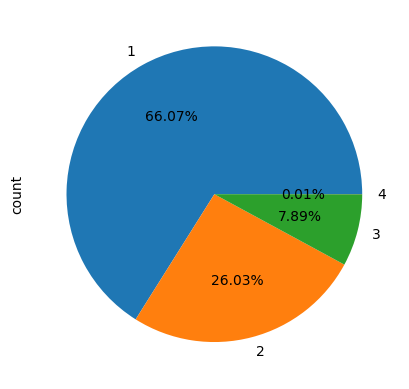

In [58]:
df1['weather'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [59]:
df1.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


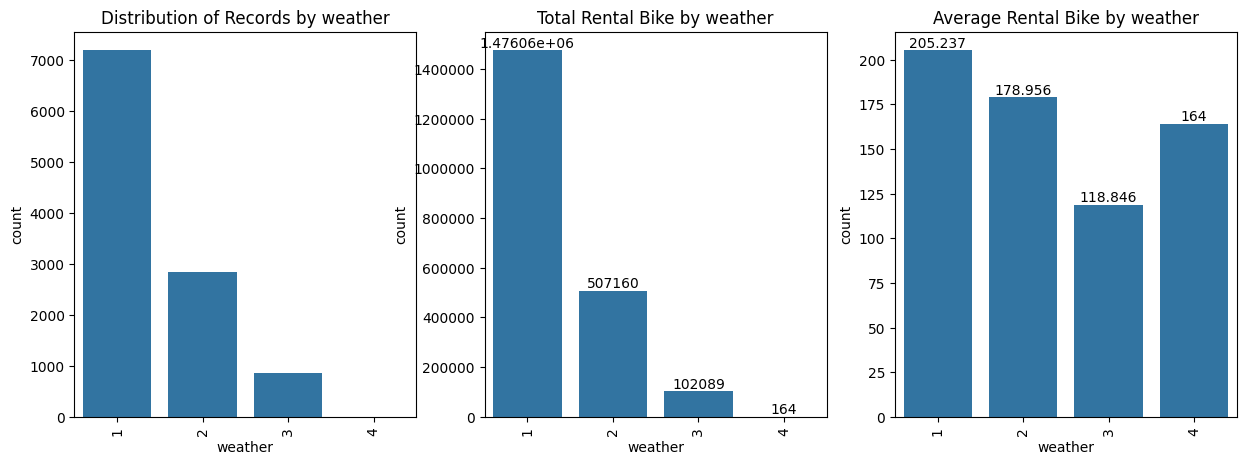

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(df1,x='weather')
plt.title('Distribution of Records by weather')
plt.xticks(rotation='vertical')


plt.subplot(1,3,2)
ax=sns.barplot(df1,x='weather',y='count', estimator='sum', errorbar=None)
plt.xticks(rotation='vertical')
plt.title('Total Rental Bike by weather')
plt.ticklabel_format(style='plain', axis='y')
ax.bar_label(ax.containers[0], fontsize=10)

plt.subplot(1,3,3)
ax=sns.barplot(df1,x='weather',y='count', errorbar=None)
plt.xticks(rotation='vertical')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Rental Bike by weather')
plt.show()

In [61]:
grouped = [group['count'].values for name, group in df1.groupby('weather')]


In [62]:
import scipy.stats as stats

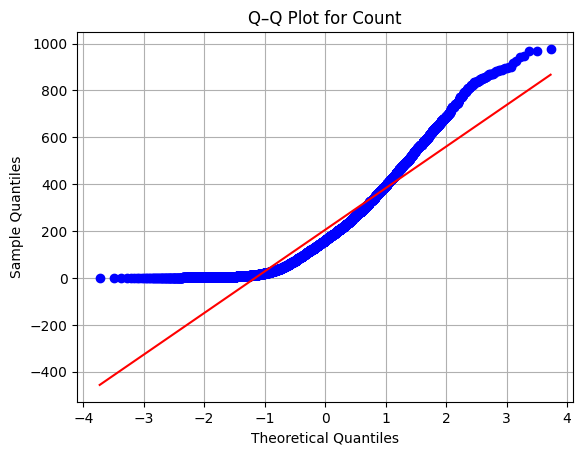

In [63]:
stats.probplot(grouped[0], dist="norm", plot=plt)
plt.title('Q–Q Plot for Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

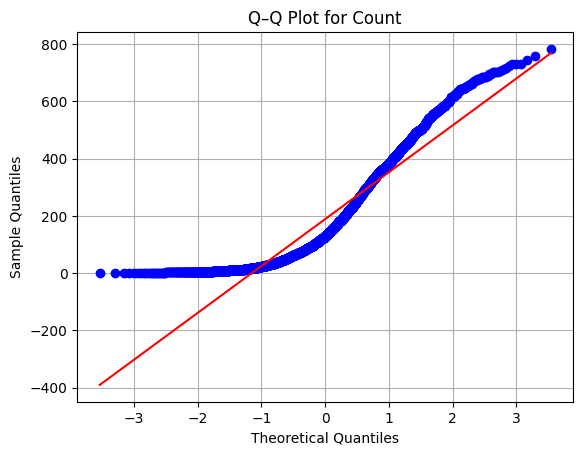

In [64]:
stats.probplot(non_workingday, dist="norm", plot=plt)
plt.title('Q–Q Plot for Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [65]:
levene(*grouped)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

In [66]:
h_stat, p_val = kruskal(*grouped)
print("Kruskal-Wallis p-value:", p_val)

Kruskal-Wallis p-value: 3.501611300708679e-44


In [67]:
f_oneway(*grouped)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

##### **Observation: Impact of Weather on Bike Rental Counts**


Bike rental activity significantly varies across different weather conditions:

1. Weather Type 1 (Clear/Partly Cloudy) sees the highest average daily rental count (205.2) and the largest sample size (n=7192).

2. As weather conditions worsen (Types 2 and 3), the average rental count drops significantly to 179 and 119 respectively.

3. Weather Type 4 has only one observation, so it is statistically irrelevant for inference.

Statistical Tests:

1. Levene’s test returned a p-value < 0.001, indicating that the variance of rental counts is not equal across weather groups (i.e., heteroscedasticity exists).

2. Both the Kruskal–Wallis test (non-parametric) and one-way ANOVA (parametric) returned extremely low p-values (< 0.001), confirming that at least one weather group has a significantly different mean rental count.

✅ Key Insight:
***Weather has a statistically significant impact on rental demand. Clear weather (Type 1) is associated with substantially higher usage, while poor weather leads to lower rental activity.***

In [68]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,is_Weekend,hour_of_Day,season_explicit,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,True,0,Winter,Early Morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,True,1,Winter,Early Morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,True,2,Winter,Early Morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,True,3,Winter,Early Morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,True,4,Winter,Early Morning


#### E. Temperature

<Axes: xlabel='temp', ylabel='Count'>

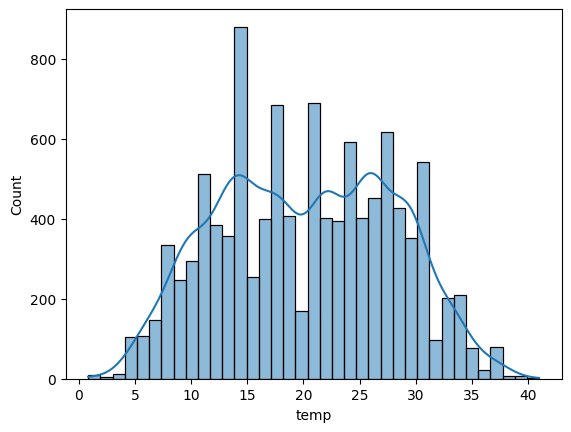

In [69]:
sns.histplot(df1['temp'],kde=True)

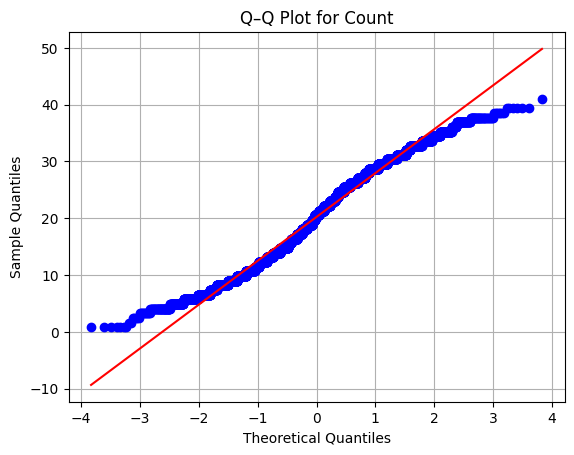

In [70]:
stats.probplot(df1['temp'], dist="norm", plot=plt)
plt.title('Q–Q Plot for Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [71]:
from statsmodels.graphics.gofplots import qqplot

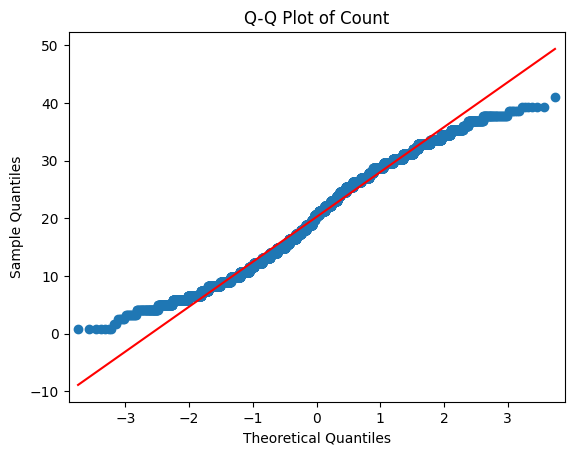

In [72]:
qqplot(df1['temp'], line='s')  # 's' draws a standardized line through the data
plt.title('Q-Q Plot of Count')
plt.show()

In [73]:
df1['temp'].describe()

,temp
count,10886.00000
mean,20.23086
std,7.79159
min,0.82000
25%,13.94000
50%,20.50000
75%,26.24000
max,41.00000


In [74]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(df1['temp']))
print("Kurtosis:", kurtosis(df1['temp']))

Skewness: 0.0036903358354289715
Kurtosis: -0.9146613849825282


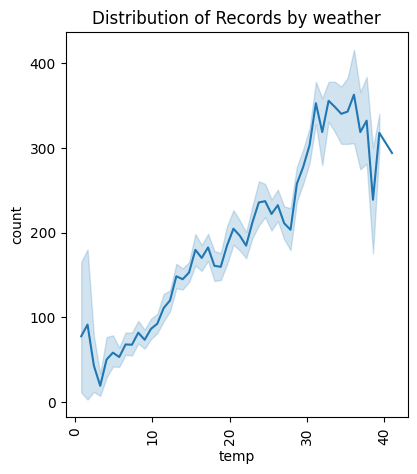

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.lineplot(df1,x='temp',y='count')
plt.title('Distribution of Records by weather')
plt.xticks(rotation='vertical')
plt.show()

In [76]:
print('Spearman',spearmanr(df1['temp'],df1['count']))
pearsonr(df1['temp'],df1['count'])

Spearman SignificanceResult(statistic=0.40798939475098117, pvalue=0.0)


PearsonRResult(statistic=0.3944536449672492, pvalue=0.0)

##### **Observation: Temperature and Order Count Analysis**



1. Temperature Distribution

  The histogram of temperature (temp) shows a fairly symmetric distribution, centered around the mean of ~20.2°C.

  Skewness ≈ 0.0037 and Kurtosis ≈ -0.91 confirm the distribution is nearly normal, but slightly platykurtic (flatter than normal).

  The KDE curve has a slight bimodal shape, suggesting possibly two distinct user behavior clusters (e.g., moderate and warm days).

2. Q-Q Plot of Count
The Q-Q plot of count deviates from the red reference line at both tails, indicating that count is not normally distributed. Therefore, normality-based parametric tests (like t-test or ANOVA) may not be appropriate unless transformation is applied.

3. Relationship Between Temperature and Count

  The lineplot of temp vs. count shows a positive trend, with a rise in counts as temperature increases, especially between 10°C to 30°C.

  There's a peak between 30°C and 35°C, after which the count may slightly decline or stabilize — possibly due to discomfort from heat.

4. Correlation Analysis

    Test	Statistic	p-value	Interpretation

    Pearson	0.394	0.000	Moderate positive linear relationship

    Spearman	0.408	0.000	Moderate positive monotonic (ranked) relation

Both tests show statistically significant positive correlation (p < 0.001), meaning as temperature increases, so does the number of rentals.

✅ **Final Observations**

📈 Warmer temperatures encourage higher rental counts, up to a threshold, indicating temperature-sensitive usage behavior.


#### F. Humidity

In [77]:
df1['humidity'].nunique()

89

<Axes: xlabel='humidity', ylabel='Count'>

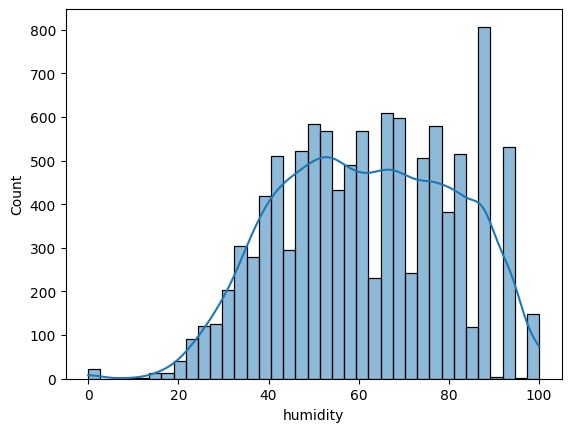

In [78]:
sns.histplot(df1['humidity'],kde=True)

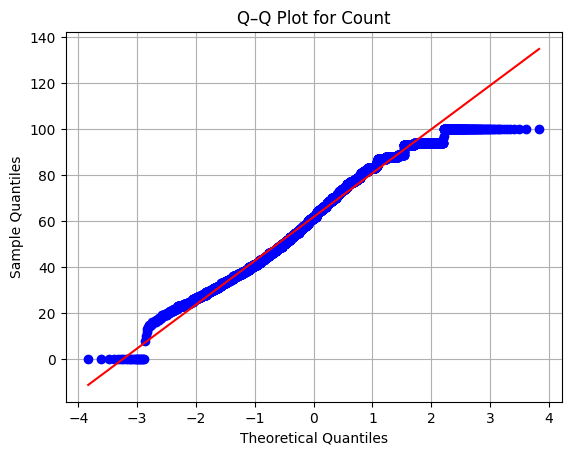

In [79]:
stats.probplot(df1['humidity'], dist="norm", plot=plt)
plt.title('Q–Q Plot for Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

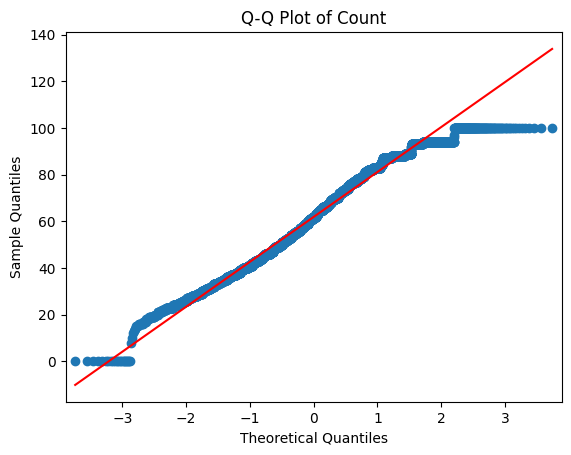

In [80]:
qqplot(df1['humidity'], line='s')  # 's' draws a standardized line through the data
plt.title('Q-Q Plot of Count')
plt.show()

In [81]:
df1['humidity'].describe()

,humidity
count,10886.000000
mean,61.886460
std,19.245033
min,0.000000
25%,47.000000
50%,62.000000
75%,77.000000
max,100.000000


In [82]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(df1['humidity']))
print("Kurtosis:", kurtosis(df1['humidity']))

Skewness: -0.0863232869219358
Kurtosis: -0.760019710012902


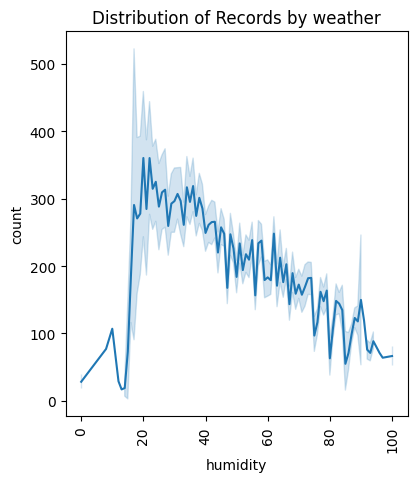

In [83]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.lineplot(df1,x='humidity',y='count')
plt.title('Distribution of Records by weather')
plt.xticks(rotation='vertical')
plt.show()

In [84]:
print('Spearman',spearmanr(df1['humidity'],df1['count']))
pearsonr(df1['humidity'],df1['count'])

Spearman SignificanceResult(statistic=-0.35404912201756106, pvalue=0.0)


PearsonRResult(statistic=-0.3173714788765946, pvalue=2.9215416637405304e-253)

##### **Observation: Humidity and Bike Rental Count Analysis**




1. Humidity Distribution

    Mean: ~61.89

    Standard Deviation: ~19.25

    Range: 0 to 100

The distribution of humidity is approximately symmetric with:

    Skewness = -0.0863 → Very slight left skew (almost symmetric)

    Kurtosis = -0.76 → Platykurtic, indicating a flatter distribution than a normal distribution

This suggests humidity values are evenly spread, and there's no significant tail behavior.

2. Correlation with Order Count

  Test	Statistic	p-value	Interpretation

  Pearson	-0.317	~0.0	Moderate negative linear correlation

  Spearman	-0.354	~0.0	Moderate negative monotonic correlation

Both correlations are statistically significant (p < 0.001).

As humidity increases, the number of bike rentals decreases. This suggests that higher humidity (e.g., muggy or rainy weather) may discourage outdoor bike use.

**✅ Key Observations**


🌦️ Humidity negatively impacts bike rentals, possibly due to discomfort or weather conditions like rain.

🧪 The relationship is moderately strong and statistically significant, both in linear and monotonic terms.

📉 Higher humidity might signal adverse riding conditions, explaining the drop in usage.


#### G. Wind

In [85]:
df1['windspeed'].nunique()

28

<Axes: xlabel='windspeed', ylabel='Count'>

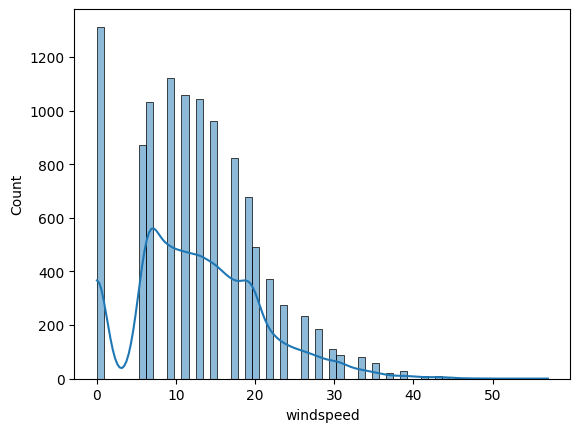

In [86]:
sns.histplot(df1['windspeed'],kde=True)

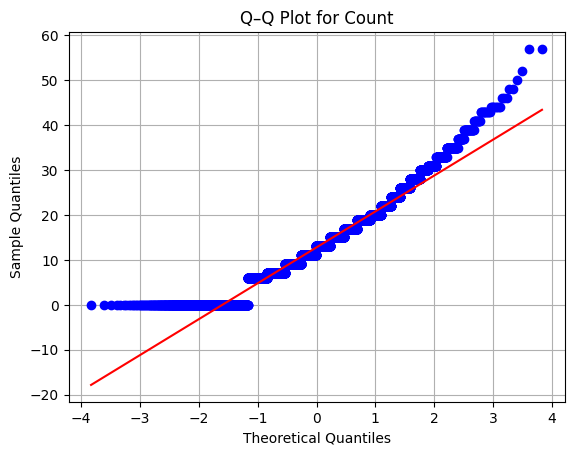

In [87]:
stats.probplot(df1['windspeed'], dist="norm", plot=plt)
plt.title('Q–Q Plot for Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

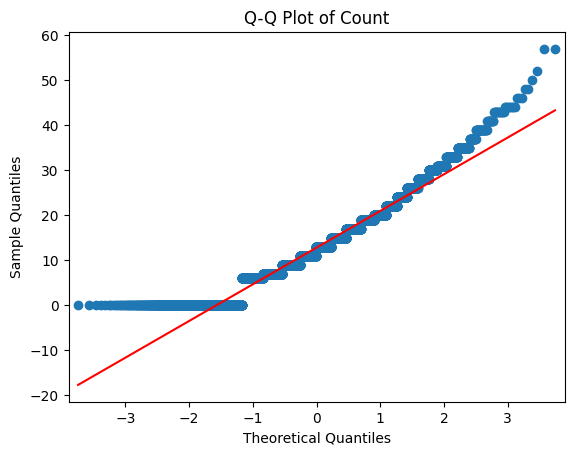

In [88]:
qqplot(df1['windspeed'], line='s')  # 's' draws a standardized line through the data
plt.title('Q-Q Plot of Count')
plt.show()

In [89]:
df1['windspeed'].describe()

,windspeed
count,10886.000000
mean,12.799395
std,8.164537
min,0.000000
25%,7.001500
50%,12.998000
75%,16.997900
max,56.996900


In [90]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(df1['windspeed']))
print("Kurtosis:", kurtosis(df1['windspeed']))

Skewness: 0.5886853963635482
Kurtosis: 0.629292367034056


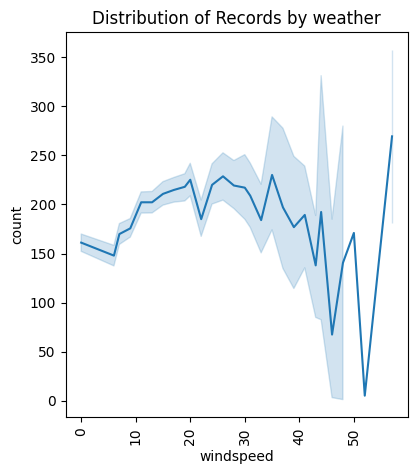

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.lineplot(df1,x='windspeed',y='count')
plt.title('Distribution of Records by weather')
plt.xticks(rotation='vertical')
plt.show()

In [92]:
print('Spearman',spearmanr(df1['windspeed'],df1['count']))
pearsonr(df1['windspeed'],df1['count'])

Spearman SignificanceResult(statistic=0.1357773747113304, pvalue=5.9015220272171205e-46)


PearsonRResult(statistic=0.10136947021033282, pvalue=2.898407203154636e-26)

##### **Observation: Wiind and Bike Rental Count Analysis**



Windspeed has minimal influence on rental counts overall, despite being statistically significant.

📈 Both linear and rank-based associations are weak.

🧮 The data shows some skewness and outliers, so any strong conclusions should be drawn cautiously.



In [93]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,is_Weekend,hour_of_Day,season_explicit,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,True,0,Winter,Early Morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,True,1,Winter,Early Morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,True,2,Winter,Early Morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,True,3,Winter,Early Morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,True,4,Winter,Early Morning


#### H. casual user


##### Checking for outlier

In [94]:
np.all((df1['casual']+df1['registered'])==df1['count'])

True

In [95]:
df1['casual'].nunique()

309

<Axes: xlabel='casual', ylabel='Count'>

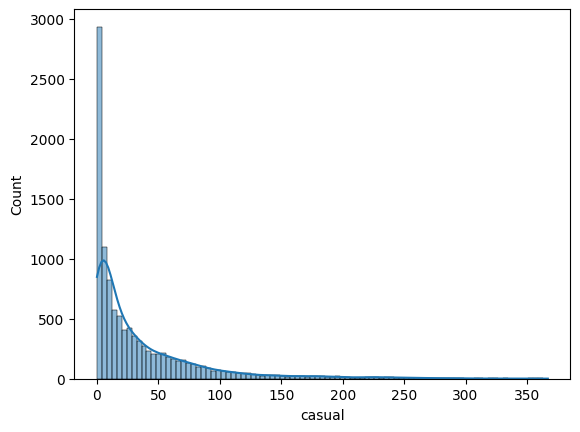

In [96]:
sns.histplot(df1['casual'],kde=True)

In [97]:
df1['casual'].describe()

,casual
count,10886.000000
mean,36.021955
std,49.960477
min,0.000000
25%,4.000000
50%,17.000000
75%,49.000000
max,367.000000


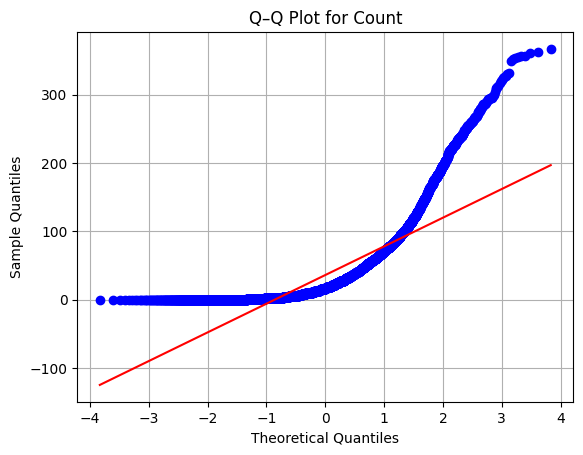

In [98]:
stats.probplot(df1['casual'], dist="norm", plot=plt)
plt.title('Q–Q Plot for Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

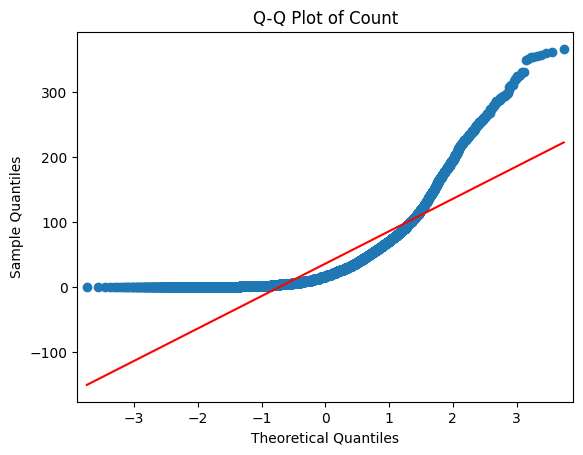

In [99]:
qqplot(df1['casual'], line='s')  # 's' draws a standardized line through the data
plt.title('Q-Q Plot of Count')
plt.show()

In [100]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(df1['casual']))
print("Kurtosis:", kurtosis(df1['casual']))

Skewness: 2.495404491505502
Kurtosis: 7.547610130561701


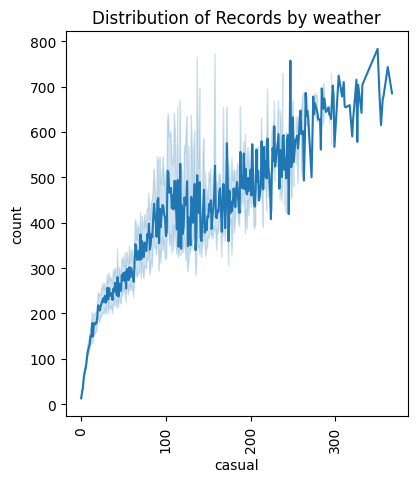

In [101]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.lineplot(df1,x='casual',y='count')
plt.title('Distribution of Records by weather')
plt.xticks(rotation='vertical')
plt.show()

In [102]:
print('Spearman',spearmanr(df1['casual'],df1['count']))
pearsonr(df1['casual'],df1['count'])

Spearman SignificanceResult(statistic=0.8473776754290643, pvalue=0.0)


PearsonRResult(statistic=0.6904135653286745, pvalue=0.0)

##### **Observation: Casual and Bike Rental Count Analysis**



🎯 Casual users are a major driver of rental volume, especially during spikes (e.g., weekends, holidays).

📊 Distribution is skewed and peaked, reflecting user behavior patterns.

🔁 Correlation results suggest tracking casual user trends can help forecast total demand effectively.



#### I. registered user


##### Checking for outlier

In [103]:
np.all((df1['registered']+df1['registered'])==df1['count'])

False

In [104]:
df1['registered'].nunique()

731

<Axes: xlabel='registered', ylabel='Count'>

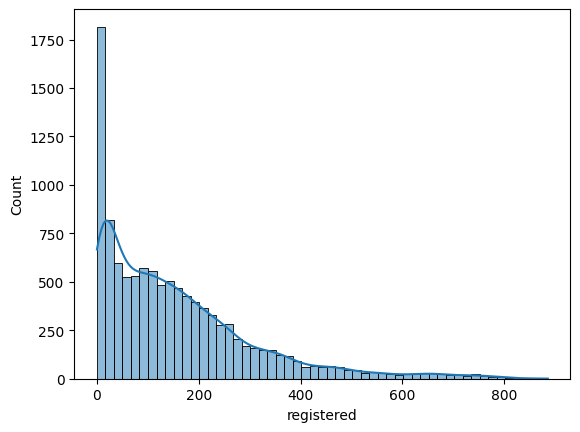

In [105]:
sns.histplot(df1['registered'],kde=True)

In [106]:
df1['registered'].describe()

,registered
count,10886.000000
mean,155.552177
std,151.039033
min,0.000000
25%,36.000000
50%,118.000000
75%,222.000000
max,886.000000


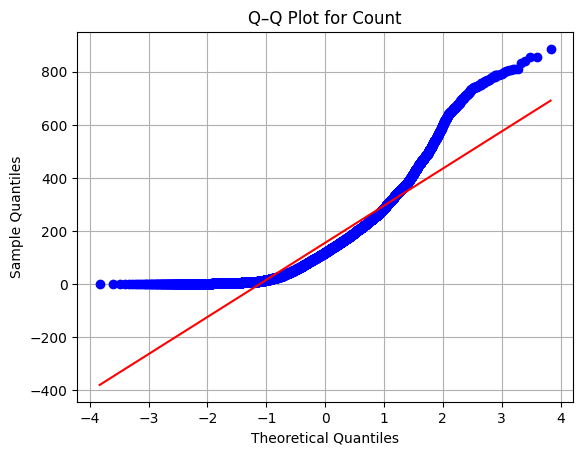

In [107]:
stats.probplot(df1['registered'], dist="norm", plot=plt)
plt.title('Q–Q Plot for Count')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

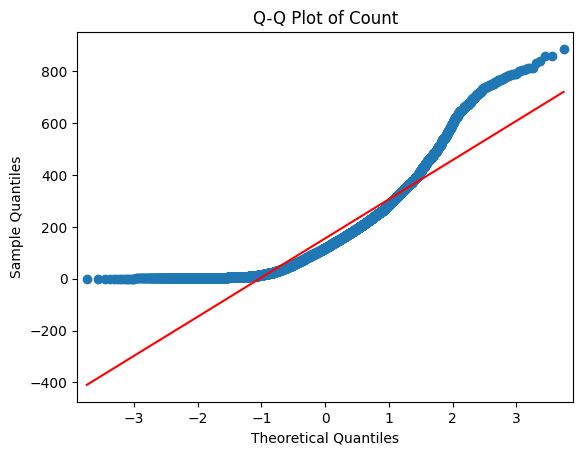

In [108]:
qqplot(df1['registered'], line='s')  # 's' draws a standardized line through the data
plt.title('Q-Q Plot of Count')
plt.show()

In [109]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(df1['registered']))
print("Kurtosis:", kurtosis(df1['registered']))

Skewness: 1.5245944734221468
Kurtosis: 2.6243238654959855


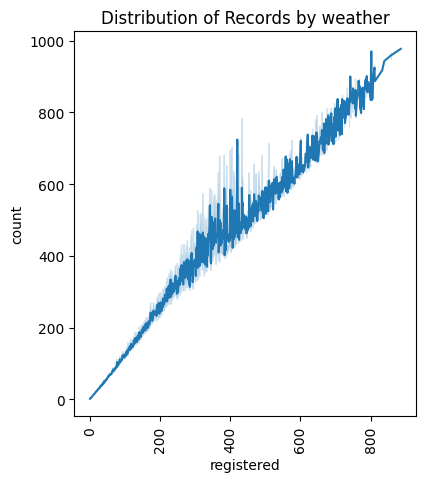

In [110]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.lineplot(df1,x='registered',y='count')
plt.title('Distribution of Records by weather')
plt.xticks(rotation='vertical')
plt.show()

In [111]:
print('Spearman',spearmanr(df1['registered'],df1['count']))
pearsonr(df1['registered'],df1['count'])

Spearman SignificanceResult(statistic=0.9889007735401409, pvalue=0.0)


PearsonRResult(statistic=0.9709481058098283, pvalue=0.0)

##### **Observation: Registered and Bike Rental Count Analysis**

Registered users are the dominant contributor to overall rental count variability.

🔄 There's a near-perfect correlation — suggesting that tracking registered user behavior alone is a strong predictor of total bike demand.

⚠️ The right skew suggests a few peak usage days

In [112]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,is_Weekend,hour_of_Day,season_explicit,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,True,0,Winter,Early Morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,True,1,Winter,Early Morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,True,2,Winter,Early Morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,True,3,Winter,Early Morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,True,4,Winter,Early Morning


### 3.Bivariate Analysis  and Impact on Product Orders

#### A. Season vs Time of Day

In [113]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,is_Weekend,hour_of_Day,season_explicit,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,True,0,Winter,Early Morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,True,1,Winter,Early Morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,True,2,Winter,Early Morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,True,3,Winter,Early Morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,True,4,Winter,Early Morning


In [114]:
observe=pd.crosstab(df1['time_of_day'],df1['season_explicit'])
observe

season_explicit,Fall,Spring,Summer,Winter
time_of_day,,,,
Early Morning,679,670,684,651
Morning,684,684,684,678
Afternoon,798,798,798,798
Evening,570,570,570,570


In [115]:
chi2_contingency(observe)

Chi2ContingencyResult(statistic=0.6558610721515772, pvalue=0.9999031316541389, dof=9, expected_freq=array([[673.34227448, 671.1232776 , 674.57505052, 664.95939739],
       [684.88241778, 682.62539041, 686.13632188, 676.35586992],
       [800.78559618, 798.14661033, 802.25169943, 790.81609407],
       [571.98971156, 570.10472166, 573.03692816, 564.86863862]]))

In [116]:
observe=pd.crosstab(df1['time_of_day'],df1['season'])
observe

season,1,2,3,4
time_of_day,,,,
Early Morning,640,681,681,682
Morning,678,684,684,684
Afternoon,798,798,798,798
Evening,570,570,570,570


In [117]:
chi2_contingency(observe)

Chi2ContingencyResult(statistic=1.34421823071003, pvalue=0.9981459023538813, dof=9, expected_freq=array([[662.2472901 , 673.8353849 , 673.8353849 , 674.08194011],
       [673.59728091, 685.38397942, 685.38397942, 685.63476024],
       [787.59066691, 801.37203748, 801.37203748, 801.66525813],
       [562.56476208, 572.4085982 , 572.4085982 , 572.61804152]]))

##### **Observation:**

The p-value (0.998) is significantly higher than the conventional alpha level of 0.05.

Therefore, we fail to reject the null hypothesis.

This indicates that there is no statistically significant association between season and time of day in terms of how rental orders are distributed.

#### B. Season vs Weather

In [118]:
observe=pd.crosstab(df1['weather'],df1['season'])
observe

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [119]:
chi2_contingency(observe)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

In [120]:
observe=pd.crosstab(df1['weather'],df1['season_explicit'])
observe

season_explicit,Fall,Spring,Summer,Winter
weather,,,,
1,1731,1711,2053,1697
2,744,775,530,785
3,256,236,153,214
4,0,0,0,1


In [121]:



 ##📌 Step 3: Create a two-way contingency table (Age vs season_explicit)
contingency_table = pd.crosstab(df1['weather'],df1['season_explicit'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of season given weather
cond_prob_City_given_gender =pd.crosstab(df1['weather'],df1['season_explicit'], normalize='index')
print("\n🎯 P(Season | weather):\n")
print(round(cond_prob_City_given_gender,2))

# Probability of weather given season_explicit
cond_prob_gendre_given_city = pd.crosstab(df1['season_explicit'],df1['weather'],normalize='index')
print("\n🌍 P(weather | Season):\n")
print(round(cond_prob_gendre_given_city ,2))

Two-Way Contingency Table:

season_explicit  Fall  Spring  Summer  Winter    All
weather                                             
1                1731    1711    2053    1697   7192
2                 744     775     530     785   2834
3                 256     236     153     214    859
4                   0       0       0       1      1
All              2731    2722    2736    2697  10886
10886

📊 Marginal Probabilities:

season_explicit  Fall  Spring  Summer  Winter   All
weather                                            
1                0.16    0.16    0.19    0.16  0.66
2                0.07    0.07    0.05    0.07  0.26
3                0.02    0.02    0.01    0.02  0.08
4                0.00    0.00    0.00    0.00  0.00
All              0.25    0.25    0.25    0.25  1.00

🎯 P(Season | weather):

season_explicit  Fall  Spring  Summer  Winter
weather                                      
1                0.24    0.24    0.29    0.24
2                0.26    0.27    0.19   

In [122]:
chi2_contingency(observe)

Chi2ContingencyResult(statistic=139.82503379601843, pvalue=1.121111071788912e-25, dof=9, expected_freq=array([[1.80427632e+03, 1.79833033e+03, 1.80757964e+03, 1.78181371e+03],
       [7.10973177e+02, 7.08630167e+02, 7.12274848e+02, 7.02121808e+02],
       [2.15499633e+02, 2.14789454e+02, 2.15894176e+02, 2.12816737e+02],
       [2.50872681e-01, 2.50045931e-01, 2.51331986e-01, 2.47749403e-01]]))

In [123]:
test=ols('count~C(weather)*C(season_explicit)',data=df1[['season_explicit','weather','count']]).fit()
annova_table=sm.stats.anova_lm(test,type=2)
annova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(weather),3.0,6.338070e+06,2.112690e+06,69.318945,2.128495e-44
C(season_explicit),3.0,1.857191e+07,6.190638e+06,203.119487,3.448619e-128
C(weather):C(season_explicit),9.0,9.048737e+05,1.005415e+05,3.298843,5.013969e-04
Residual,10873.0,3.313853e+08,3.047781e+04,NaN,NaN


##### **Observation:**


1. Since the p-value is significantly less than 0.05, we reject the null hypothesis.

2. This means there is a statistically significant association between season and weather condition.

3. The distribution of weather types is not uniform across different seasons, which is also intuitive (e.g., more clear weather in summer, more fog/rain in winter, etc.).

4. Both season and weather independently have strong effects on rental demand.

5. There is also a significant interaction between season and weather, meaning the impact of weather on demand varies depending on the season


🔍 Additional Insights from Probability Tables:

1. The likelihood of clear weather (Type 1) is highest during summer (75%), while misty/cloudy (Type 2) and light rain/snow (Type 3) are more balanced in other seasons.

2. Severe weather (Type 4) is extremely rare (only 1 observation, in winter).

3. P(season | weather) shows that summer sees the highest share of clear weather, which may explain peak demand patterns in that season.

#### C. Season vs User

In [124]:
df1.groupby(['season_explicit'])['casual'].describe()

<ipython-input-124-60871c6839a2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby(['season_explicit'])['casual'].describe()


,count,mean,std,min,25%,50%,75%,max
season_explicit,,,,,,,,
Fall,2731.0,40.036983,53.542463,0.0,6.0,21.0,51.0,362.0
Spring,2722.0,38.998530,54.320648,0.0,5.0,19.0,51.0,367.0
Summer,2736.0,53.139985,53.497395,0.0,11.0,39.0,75.0,297.0
Winter,2697.0,11.586578,19.321772,0.0,1.0,5.0,13.0,229.0


In [125]:
df1.groupby(['season'])['casual'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,15.489576,31.222498,0.0,1.0,5.0,15.0,367.0
2,2733.0,47.446762,57.649556,0.0,8.0,29.0,63.0,361.0
3,2733.0,52.220271,54.638059,0.0,10.0,36.0,74.0,350.0
4,2734.0,28.580834,42.596214,0.0,4.0,14.0,33.0,362.0


In [126]:
df1.groupby(['season'])['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,100.853686,108.082025,0.0,22.0,69.0,141.00,681.0
2,2733.0,167.804610,156.156658,0.0,39.0,133.0,243.00,782.0
3,2733.0,182.196853,164.386982,0.0,53.0,151.0,252.00,886.0
4,2734.0,170.407462,154.828357,1.0,46.0,139.0,238.75,857.0


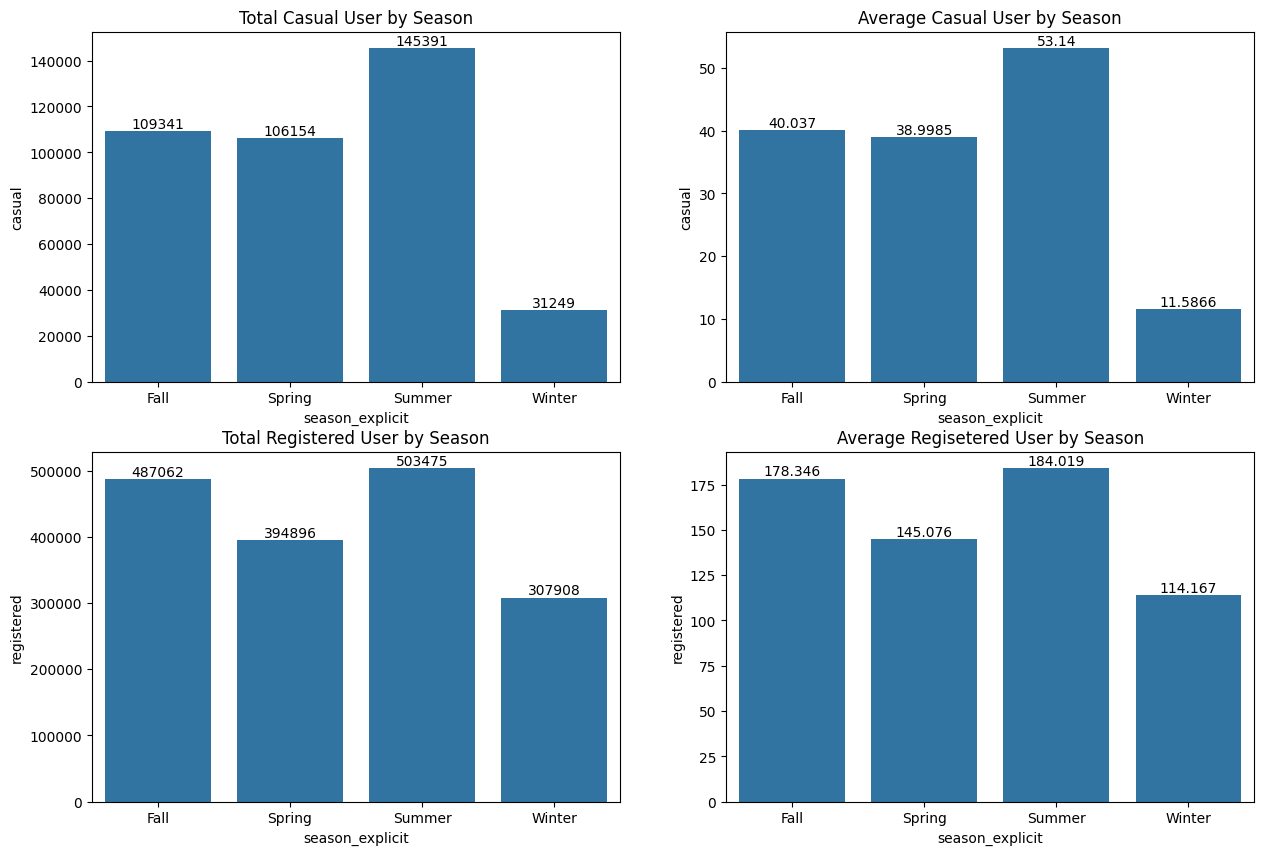

In [127]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax=sns.barplot(df1,x='season_explicit',y='casual',estimator='sum',errorbar=None)
plt.title('Total Casual User by Season')
ax.bar_label(ax.containers[0], fontsize=10);
plt.subplot(2,2,2)
ax=sns.barplot(df1,x='season_explicit',y='casual',errorbar=None)
plt.title('Average Casual User by Season')
ax.bar_label(ax.containers[0], fontsize=10);


plt.subplot(2,2,3)
ax=sns.barplot(df1,x='season_explicit',y='registered',estimator='sum',errorbar=None)
plt.title('Total Registered User by Season')
ax.bar_label(ax.containers[0], fontsize=10);
plt.subplot(2,2,4)
ax=sns.barplot(df1,x='season_explicit',y='registered',errorbar=None)
plt.title('Average Regisetered User by Season')
ax.bar_label(ax.containers[0], fontsize=10);


plt.show()


In [128]:
Fall=df1['casual'][df1['season_explicit']=='Fall']
Spring=df1['casual'][df1['season_explicit']=='Spring']
Summer=df1['casual'][df1['season_explicit']=='Summer']
Winter=df1['casual'][df1['season_explicit']=='Winter']
shapiro(Fall),shapiro(Spring),shapiro(Summer),shapiro(Winter)

(ShapiroResult(statistic=0.7108849604081486, pvalue=3.8882364835692346e-56),
 ShapiroResult(statistic=0.6914126179007014, pvalue=3.153620838130092e-57),
 ShapiroResult(statistic=0.8426327400646079, pvalue=5.85498659108043e-46),
 ShapiroResult(statistic=0.5744502546163965, pvalue=6.554063986343844e-63))

In [129]:
grouped = [group['casual'].values for name, group in df1.groupby('season')]
h_stat, p_val = kruskal(*grouped)
print("Kruskal-Wallis p-value:", p_val)

Kruskal-Wallis p-value: 0.0


In [130]:
h_stat, p_val = f_oneway(*grouped)
print("ANOWA one way p-value:", p_val)

ANOWA one way p-value: 7.937798855774506e-214


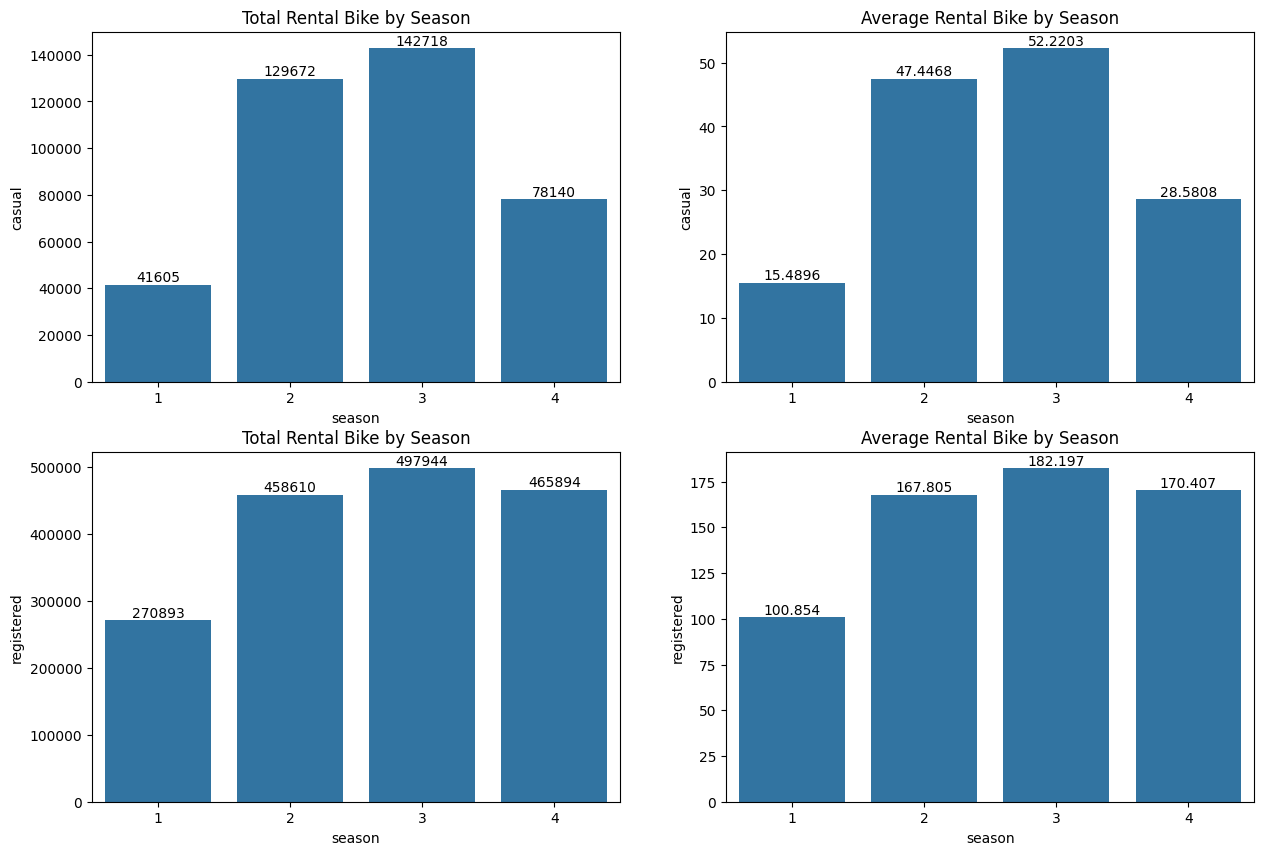

In [131]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax=sns.barplot(df1,x='season',y='casual',estimator='sum',errorbar=None)
plt.title('Total Rental Bike by Season')
ax.bar_label(ax.containers[0], fontsize=10);
plt.subplot(2,2,2)
ax=sns.barplot(df1,x='season',y='casual',errorbar=None)
plt.title('Average Rental Bike by Season')
ax.bar_label(ax.containers[0], fontsize=10);


plt.subplot(2,2,3)
ax=sns.barplot(df1,x='season',y='registered',estimator='sum',errorbar=None)
plt.title('Total Rental Bike by Season')
ax.bar_label(ax.containers[0], fontsize=10);
plt.subplot(2,2,4)
ax=sns.barplot(df1,x='season',y='registered',errorbar=None)
plt.title('Average Rental Bike by Season')
ax.bar_label(ax.containers[0], fontsize=10);


plt.show()


In [132]:
Fall=df1['casual'][df1['season']=='Fall']
Spring=df1['casual'][df1['season']=='Spring']
Summer=df1['casual'][df1['season']=='Summer']
Winter=df1['casual'][df1['season']=='Winter']
shapiro(Fall),shapiro(Spring),shapiro(Summer),shapiro(Winter)

ValueError: Data must be at least length 3.

In [ ]:
grouped = [group['casual'].values for name, group in df1.groupby('season')]
h_stat, p_val = kruskal(*grouped)
print("Kruskal-Wallis p-value:", p_val)

In [ ]:
h_stat, p_val = f_oneway(*grouped)
print("ANOWA one way p-value:", p_val)

##### **Observation:**

1. Both casual and registered users show significantly different rental patterns across seasons.

2. Casual users prefer summer and fall, while registered users are more consistent year-round.

3. Statistical tests confirm these differences are highly significant, and not due to random chance.

4. These insights are valuable for seasonal marketing, resource planning, and inventory management.

#### D. Time of Day vs  User

In [ ]:
df1.groupby(['time_of_day'])['casual'].describe()

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax=sns.barplot(df1,x='time_of_day',y='casual',estimator='sum',errorbar=None)
plt.title('Total Casual user by time_of_day')
ax.bar_label(ax.containers[0], fontsize=10);
plt.subplot(2,2,2)
ax=sns.barplot(df1,x='time_of_day',y='casual',errorbar=None)
plt.title('Average Casua User by time_of_day')
ax.bar_label(ax.containers[0], fontsize=10);


plt.subplot(2,2,3)
ax=sns.barplot(df1,x='time_of_day',y='registered',estimator='sum',errorbar=None)
plt.title('Total Registered User by time_of_day')
ax.bar_label(ax.containers[0], fontsize=10);
plt.subplot(2,2,4)
ax=sns.barplot(df1,x='time_of_day',y='registered',errorbar=None)
plt.title('Average Registered User by time_of_day')
ax.bar_label(ax.containers[0], fontsize=10);


plt.show()


In [ ]:
Fall=df1['casual'][df1['time_of_day']=='Early Morning']
Spring=df1['casual'][df1['time_of_day']=='Morning']
Summer=df1['casual'][df1['time_of_day']=='Afternoon']
Winter=df1['casual'][df1['time_of_day']=='Evening']
shapiro(Fall),shapiro(Spring),shapiro(Summer),shapiro(Winter)

In [ ]:
grouped = [group['casual'].values for name, group in df1.groupby('time_of_day')]
h_stat, p_val = kruskal(*grouped)
print("Kruskal-Wallis p-value:", p_val)

In [ ]:
h_stat, p_val = f_oneway(Fall,Spring,Summer,Winter)
print("ANOWA one way p-value:", p_val)

#### E. weather vs  User

In [ ]:
df1.groupby(['time_of_day'])['casual'].describe()

In [ ]:
df1.groupby(['weather'])['registered'].describe()

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax=sns.barplot(df1,x='weather',y='casual',estimator='sum',errorbar=None)
plt.title('Total Rental Bike by weather')
ax.bar_label(ax.containers[0], fontsize=10);
plt.subplot(2,2,2)
ax=sns.barplot(df1,x='weather',y='casual',errorbar=None)
plt.title('Average Rental Bike by weather')
ax.bar_label(ax.containers[0], fontsize=10);


plt.subplot(2,2,3)
ax=sns.barplot(df1,x='weather',y='registered',estimator='sum',errorbar=None)
plt.title('Total Rental Bike by weather')
ax.bar_label(ax.containers[0], fontsize=10);
plt.subplot(2,2,4)
ax=sns.barplot(df1,x='weather',y='registered',errorbar=None)
plt.title('Average Rental Bike by weather')
ax.bar_label(ax.containers[0], fontsize=10);


plt.show()


In [ ]:
Fall=df1['casual'][df1['weather']==1]
Spring=df1['casual'][df1['weather']==2]
Summer=df1['casual'][df1['weather']==3]
Winter=df1['casual'][df1['weather']==4]
shapiro(Fall),shapiro(Spring),shapiro(Summer),shapiro(Winter)

In [ ]:
grouped = [group['casual'].values for name, group in df1.groupby('weather')]
h_stat, p_val = kruskal(*grouped)
print("Kruskal-Wallis p-value:", p_val)

In [ ]:
h_stat, p_val = f_oneway(*grouped)
print("ANOWA one way p-value:", p_val)

###### **Observation:**


1. Both casual and registered users are significantly affected by weather conditions, with clear weather encouraging higher rentals.

2. The effect is stronger for casual users, likely due to their greater preference for good outdoor conditions.

3. Statistical evidence (both parametric and non-parametric) confirms the weather-rental relationship is highly significant.

🔍 Implication: Weather forecasts can be used to predict demand and optimize resource allocation (e.g., bike availability, staffing).

## 2.Reccomendation


### ✅ **Final Recommendation: Strategic Optimization of Bike Rental Operations**

Based on the comprehensive analysis and statistically significant observations, the following **actionable recommendation** is proposed:

---

## 🎯 **Data-Driven Optimization Strategy for Bike Rental Services**

### 1. **Dynamic Demand Forecasting**

Use **time of day, season, weather, and humidity** data to build predictive models for rental demand. These models should inform decisions on:

* **Bike distribution** (e.g., relocating bikes to high-demand areas in peak seasons or hours).
* **Staffing levels** (e.g., more staff during clear weather weekends or summer evenings).
* **Maintenance scheduling** (e.g., prioritize during off-peak hours or seasons).

---

### 2. **Inventory and Resource Planning**

* **Casual users** peak in summer and fall, especially in clear weather — **increase bike inventory and visibility** (ads, events) in these conditions.
* **Registered users** are more stable year-round — **ensure consistent service** through the year with emphasis on commute hours.

---

### 3. **Weather-Aware Operations**

Implement real-time **weather-integrated demand forecasting** tools:

* Anticipate **drops in demand** during high humidity or poor weather days (Types 2 and 3).
* Increase **availability and promotions** during sunny (Type 1) periods, especially in summer.

---

### 4. **Segmented User Targeting**

* **Casual Users:**

  * Target with **seasonal campaigns, promotions, and events**.
  * Focus on **weekends, holidays, and good weather** periods.
* **Registered Users:**

  * Focus on **commuting features**, loyalty programs, and service consistency.

---

### 5. **Marketing & Communication Strategy**

* Use **seasonal insights** to plan campaigns:

  * Summer = promote outdoor fun, tourist use, casual rides.
  * Winter = emphasize safety, reliable commuting for registered users.
* Promote **weather-related offers** (e.g., discounts on gloomy days to drive usage).

---

### 6. **Policy & Strategic Recommendations**

* Collaborate with city planners to **enhance bike lanes** and infrastructure during high-demand periods.
* Consider **expanding service zones or hours** in high-traffic time slots (evenings, summer weekends).
* Develop a **resilience plan for weather variability** (e.g., temporary hubs or shelters in poor weather zones).

---

### 🔚 **Conclusion**

Bike rental usage is significantly influenced by **seasonality, weather, humidity, and time of day**, with strong evidence from statistical testing. Leveraging these insights through **targeted, data-driven operations and marketing** can significantly enhance efficiency, customer satisfaction, and profitability.
